This part of the assignment deals with discrete Fourier transform as well as python programming.

A fan is rotating with a constant angular velocity. You are measuring the angle of the fan, with respect to time. To capture this signal reliably, you have to choose your sampling rate carefully.
Otherwise, you may see aliasing: https://www.youtube.com/watch?v=R-IVw8OKjvQ

### Instructions:
- Please rename this file with Your Roll No.
- Only edit at "### WRITE YOUR CODE HERE"
- Evaluation will be done by calling all functions from a test script, so make sure they compile correctly
- Render (Kernel > Restart & Run All) before submitting, so that we can see your graphs here

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## GENERATE SAMPLES : 3+5 MARKS

In [20]:
def generate_x(omega, t, x0=0):
    '''
    Inputs:
        omega: scalar float, the angular velocity in radians/s
        t: scalar float, time in s
        x0: scalar float, initial angle at t=0 in radians, default x0=0
    Outputs:
        x: scalar float, angle at t=t in radians, between [0, 2 pi)
    '''

    ### WRITE YOUR CODE HERE - 3 MARKS
    x = x0 + (omega*t)%(2*np.pi)
    if(np.all(np.isclose([x],[2*np.pi], atol=0.0001)) or np.all(np.isclose([x],[0], atol=0.0001))):
        x = 0
    return x

In [21]:
# This is how you can test if your code is working fine
def test_generate_x():
    x = generate_x(2*np.pi, 2)
    assert x==0                # assert that your method returns the correct answer.
                               # If not, this statement will give an assertion error.
    print('Test passed', '\U0001F44D')
    
# Please do not call any function without using "if __name__=="__main__":" statement. 
# Otherwise, it will be difficult for the TAs to compile
if __name__=="__main__":
    test_generate_x()

Test passed 👍


In [22]:
def sample_x(omega, Fs, tfinal):
    '''
    Inputs:
        omega: scalar float, the angular velocity in radians/s
        Fs: (float) sampling rate in Hz
        tfinal: (float) final time in s
    Output:
        xs: (np array, 1D float) samples of x from t=0 to t=tfinal
        ts: (np array, 1D float) samples of t from t=0 to t=tfinal, sampled uniformly
    '''

    ### WRITE YOUR CODE HERE - 5 MARKS
    x = []
    t = []
    delt = 1/Fs
    tempt = 0
    while(tempt < tfinal):
      x.append(generate_x(omega, tempt, x0=0))
      t.append(tempt)
      tempt += delt
    xs = np.array(x)
    ts = np.array(t)

    return xs, ts

In [23]:
def test_sample_x():
    xs,ts = sample_x(2*np.pi, 2, 2)
    assert np.all( np.isclose(xs, np.array([0., np.pi, 0., np.pi]), atol=0.001) )
    assert np.all(np.isclose(ts, np.array([0. , 0.5, 1. , 1.5]), atol=0.001) )
    print('Test passed', '\U0001F44D')

if __name__=="__main__":
    test_sample_x()

Test passed 👍


### Plot Samples

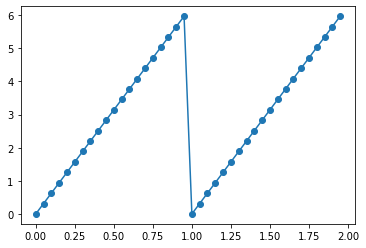

In [24]:
def plot_xs(xs,ts):
    plt.plot(ts, xs, 'o-')

if __name__=="__main__":
    xs,ts = sample_x(2*np.pi, 20, 2)
    plot_xs(xs,ts)
    plt.show()

# DFT OF TIME SERIES : 5 MARKS

In [25]:
def dft_xs(xs, ts, Nfft):
    '''
    Inputs:
        xs, ts: defined above. Note that ts are uniformly sampled
        Nfft: (float) window size for DFT. It may be smaller or larger than len(xs)
    Outputs:
        Xs: (np array of shape (Nfft,)) magnitude dft of xs
        fs: (np array of shape (Nfft,)) frequency value (in Hz) of corresponding index of Xs
    '''

    ### WRITE YOUR CODE HERE - 5 MARKS
    X = []
    f = []
    N = min(Nfft,len(xs))
    
    for i in range(N):
      temps = complex(0,0)
      for k in range(N):
        temps += xs[k]*np.exp(-2j*k*i*np.pi/N)
      X.append(abs(temps))
      f.append(i/(N*(ts[1]-ts[0])))
    X[0] = X[-1]
    Xs=np.array(X)
    fs=np.array(f)

    return Xs, fs

In [26]:
def test_dft_xs():
    xs, ts = sample_x(20*np.pi, 10, 5)
    Nfft = 5
    Xs, fs = dft_xs(xs, ts, Nfft=Nfft)
    assert Xs.shape==(Nfft,) or Xs.shape==(Nfft,1)
    assert fs.shape==(Nfft,) or fs.shape==(Nfft,1)
    print('Test passed', '\U0001F44D')
if __name__=="__main__":
    test_dft_xs()

Test passed 👍


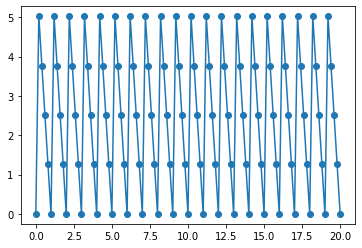

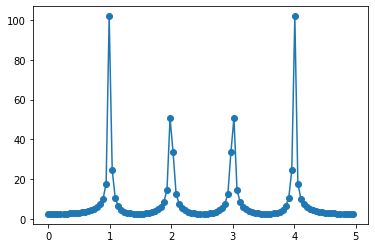

In [27]:
def plot_Xs(Xs,fs):
    plt.plot(fs,Xs,'o-')
    plt.show()
#     Nfft = len(xs)
#     Xs1 = np.fft.fft(xs,Nfft)
#     Xs[0]=Xs[-1]
#     plt.plot(fs,Xs)
    
if __name__=="__main__":
    xs,ts=sample_x(2*np.pi*4, 5, 20)
    plot_xs(xs,ts)
    plt.figure()
    Xs,fs = dft_xs(xs,ts, 200)
    plot_Xs(Xs,fs)

# BONUS QUESTION : 5+2 MARKS
## The effect of changing sampling frequency
Use the above functions to:
1. Generate xs with omega = $20\pi$ for tfinal=5s. Sample with a range of frequencies from 5 to 35, Fs=np.arange(5,35,2.5)
2. For each Fs, compute Xs, and plot it as Xs vs f with proper axes labels. Fix the xlim to be 0 to 50Hz on all the plots.

Help: To avoid seeing unnecessary peaks at f=0, normalize xs to have zero mean.

## Observations
What do you see above? Aliasing?

1. What happens when Fs < 10Hz?
2. What happens when 10Hz < Fs < 20 Hz?
3. What happens when Fs > 20 Hz?

Write your observations below as text:

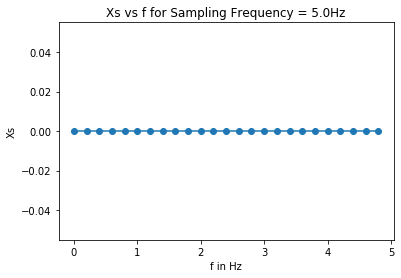

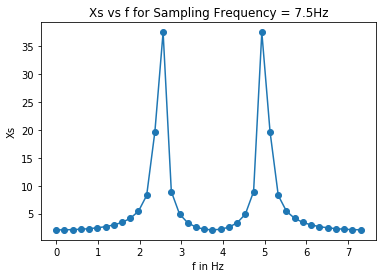

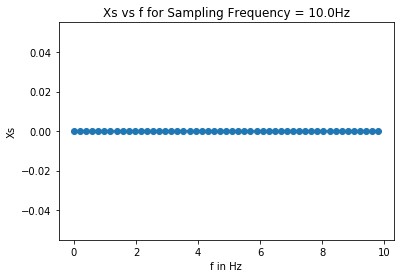

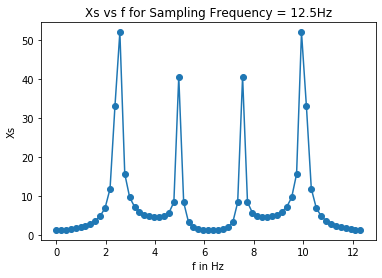

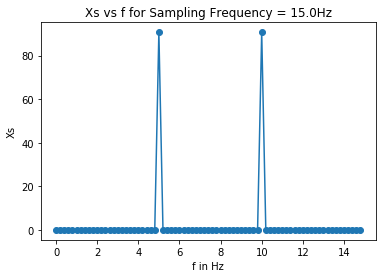

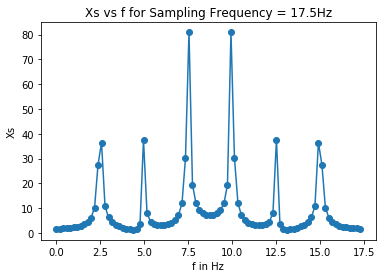

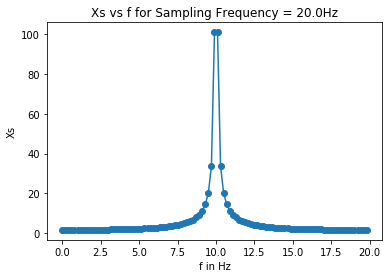

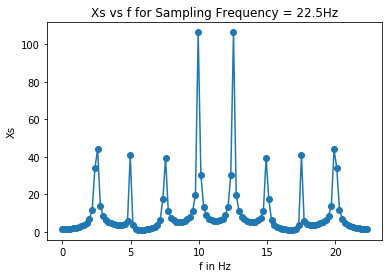

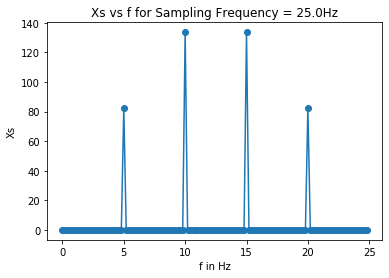

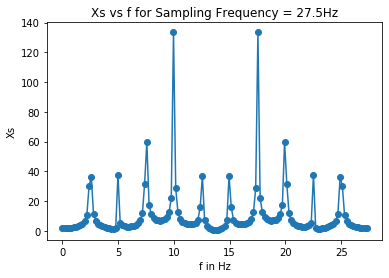

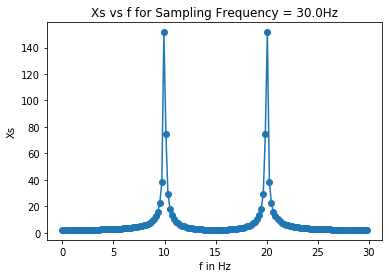

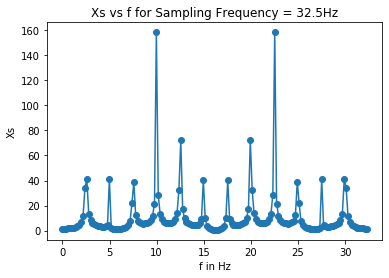

In [28]:
def changingFs():

    ### WRITE YOUR CODE HERE - 5 MARKS
    Omega = 20*np.pi
    tfinal = 5
    Fs = np.arange(5,35,2.5)
    for k in range(len(Fs)):
      xs,ts=sample_x(Omega, Fs[k], tfinal)
      Xs,fs = dft_xs(xs,ts,len(xs))
      plt.figure()
      #plt.xlim(left=0, right=50)
      plt.xlabel("f in Hz")
      plt.ylabel("Xs")
      plt.title("Xs vs f for Sampling Frequency = "+str(Fs[k])+"Hz")
      plot_Xs(Xs,fs)
#       plt.figure()
#       Xs1 = np.fft.fft(xs,len(xs))
#       Xs1[0]=Xs1[-1]
#       plt.xlim(left=0, right=50)
#       plt.plot(fs,abs(Xs1))

    return

if __name__=="__main__":
    changingFs()

(2 marks) (double-click to edit)
1. For Fs < 10 Hz, aliasing will occur. And when Fs is equal to the factors of 10Hz i.e. 5Hz and 10Hz, the DFT will show a constant curve of zero as then the sampling rate becomes equal to the frequency or we can say that the samples observed are same.

2. For 10Hz < Fs < 20Hz, aliasing will still occur but the effect earlier observed wouldn't be observed now. Also, on increasing the sampling rate after Fs = 10Hz, a peak will we observed at 10Hz and the peaks in the graph come closer as we increase the sampling rate and then at last at 20Hz, we see only one peak at 10Hz.

3. For Fs > 20Hz, aliasing stops as now, Fs > 2F where F is the frequency of spinning of fan. But the peaks start diverging as we increase the numbers of samples i.e. increasing the sample space and spacing. So, we now get two peaks - one at 10Hz and the other is variable and the distance between them increases as we increase Fs.